# Pymaceuticals Inc.
---

### Analysis

- From reviewing the box plot data it appears that Capomulin and Ramicane are the most effective; their average final tumor volumes were much lower than Infubinol and Ceftamin.
- There was a strong correlation between mouse weight and tumor volume (around 0.84) observed in the Capomulin data - meaning weight could contribute to tumor growth/size.
- There was an outlier noted in the Infubinol data.  With how far this piece of data was out of range, it was likely data error.
 

In [297]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [298]:
# Checking the number of mice.
mouse_count = len(data_complete["Mouse ID"].unique())
mouse_count

249

In [299]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data_complete.loc[data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [300]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_info = data_complete.loc[data_complete["Mouse ID"] == "g989"]
dupe_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [301]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = data_complete[data_complete["Mouse ID"].isin(duplicate_mouse)==False]
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [302]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [303]:
clean_data["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [304]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
variance = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
standard_dev = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
sem = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({"Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": variance,
                        "Tumor Volume Std Dev": standard_dev,
                        "Tumor Volume Std Err": sem})
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [305]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [306]:
mice_per_drug = clean_data["Drug Regimen"].value_counts()
mice_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

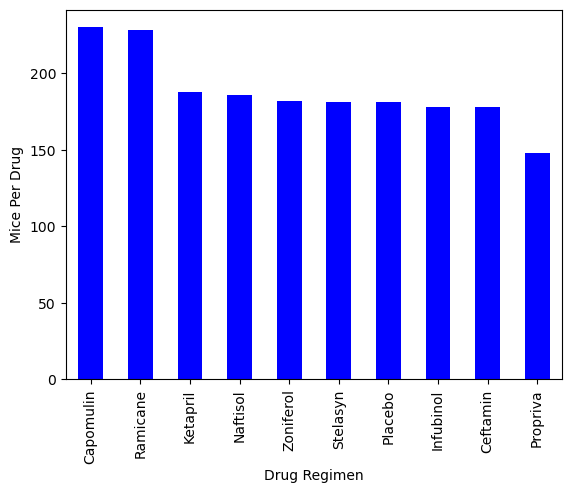

In [307]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug.plot.bar(color="blue")
plt.ylabel("Mice Per Drug")
plt.show()

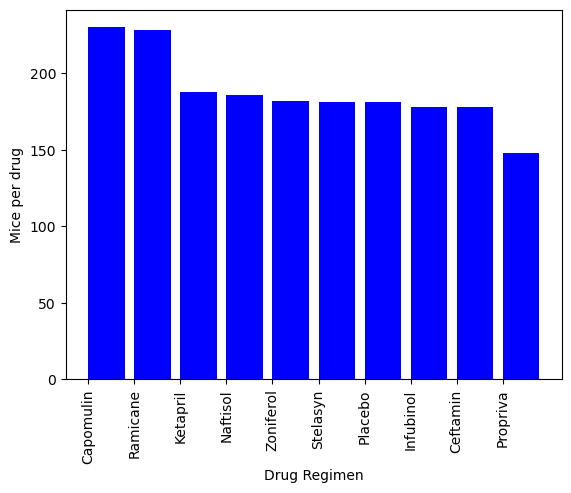

In [308]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_per_drug.index.values
y_axis = mice_per_drug.values
plt.bar(x_axis, y_axis, color="blue", align="edge")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice per drug")
plt.xticks(rotation="vertical")

plt.show()

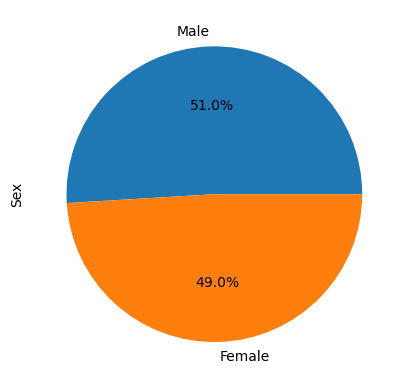

In [309]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()



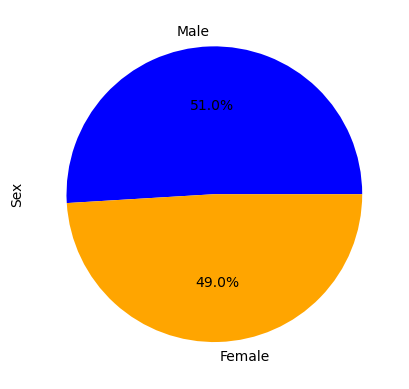

In [310]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "orange"]
plt.pie(mice_gender, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [311]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_list = clean_data[clean_data["Drug Regimen"].isin(drug_list)]
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = final_list.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor = pd.merge(data_complete, last_timepoint, on=("Mouse ID", "Timepoint"), how='right')


In [312]:
last_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [313]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes   
# add subset 
for drug in drug_list:
    tumor_info = last_tumor.loc[last_tumor["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    vol_data.append(tumor_info)
    
    quartiles = tumor_info.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
           
    # Determine outliers using upper and lower bounds
    outliers = tumor_info.loc[(tumor_info > upper_bound) | (tumor_info < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


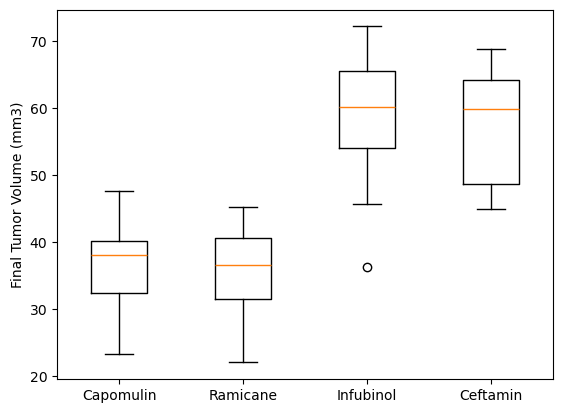

In [314]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(vol_data, labels=drug_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [315]:
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


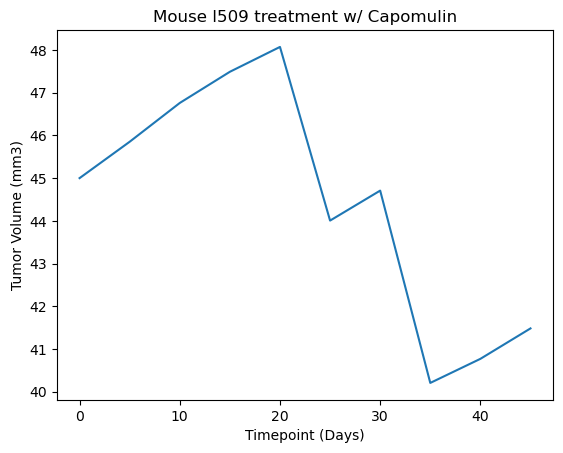

In [316]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]
cap_x = cap_mouse["Timepoint"]
cap_y = cap_mouse["Tumor Volume (mm3)"]

plt.plot(cap_x, cap_y)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse l509 treatment w/ Capomulin")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

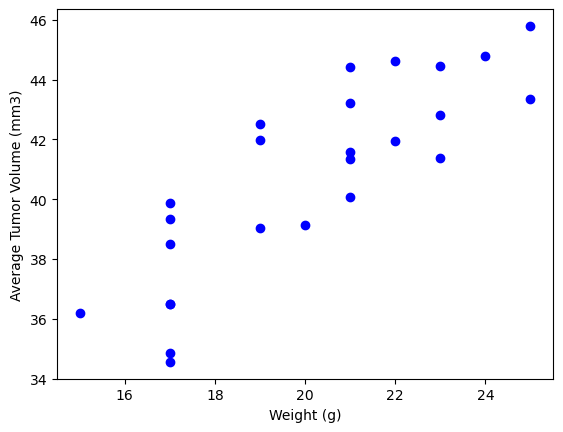

In [317]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_cap = capomulin_data["Tumor Volume (mm3)"].groupby(capomulin_data["Mouse ID"]).mean()
mouse_weight = capomulin_data["Weight (g)"].groupby(capomulin_data["Mouse ID"]).mean()

plt.scatter(mouse_weight, avg_cap, color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


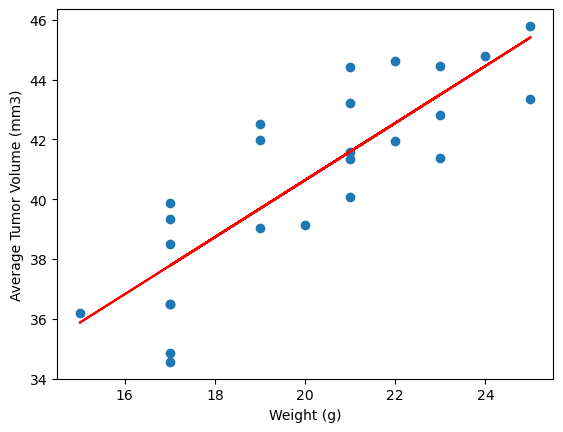

In [318]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_cap)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_cap)
regress_values = mouse_weight * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_cap)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()